In [1]:
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

In [3]:
img_path = "/media/brats/DRIVE1/akansh/lung-seg/data/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/CXR_png"
img_mask_left = "/media/brats/DRIVE1/akansh/lung-seg/data/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ManualMask/leftMask"
img_mask_right = "/media/brats/DRIVE1/akansh/lung-seg/data/data.lhncbc.nlm.nih.gov/public/Tuberculosis-Chest-X-ray-Datasets/Montgomery-County-CXR-Set/MontgomerySet/ManualMask/rightMask"

In [4]:
print(f"Number of files in img_path:{len([i for i in os.listdir(img_path) if i.endswith('.png')])}")
print(f"Number of files in img_mask_left: {len([i for i in os.listdir(img_mask_left) if i.endswith('.png')])}")
print(f"Number of files in img_mask_right: {len([i for i in os.listdir(img_mask_right) if i.endswith('.png')])}")

Number of files in img_path:138
Number of files in img_mask_left: 138
Number of files in img_mask_right: 138


In [5]:
img_names = [i for i in os.listdir(img_path) if i.endswith('.png')]
left_mask = [i for i in os.listdir(img_mask_left) if i.endswith('.png')]
right_mask = [i for i in os.listdir(img_mask_right) if i.endswith('.png')]
img_names.sort()
left_mask.sort()
right_mask.sort()


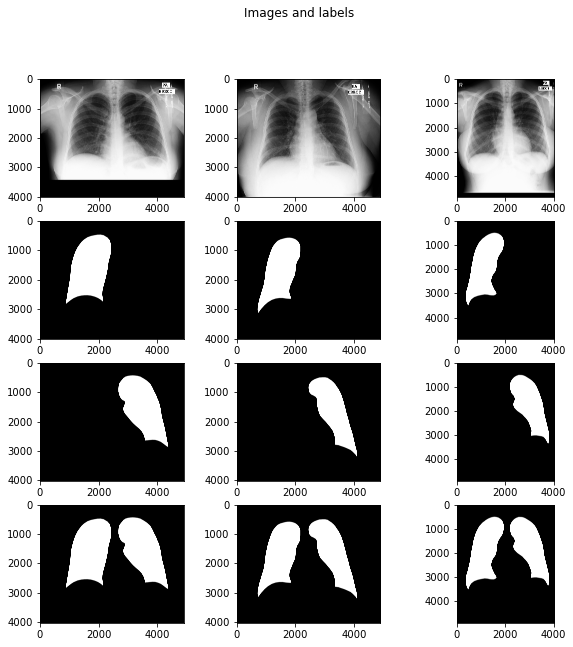

In [51]:
#plot
fig, ax = plt.subplots(4, 3, figsize = (10,10))
fig.suptitle('Images and labels')
ax[0][0].imshow(plt.imread(os.path.join(img_path,img_names[0])), cmap = 'gray')
ax[0][1].imshow(plt.imread(os.path.join(img_path,img_names[1])), cmap = 'gray')
ax[0][2].imshow(plt.imread(os.path.join(img_path,img_names[2])), cmap = 'gray')
ax[1][0].imshow(plt.imread(os.path.join(img_mask_left,img_names[0])), cmap = 'gray')
ax[1][1].imshow(plt.imread(os.path.join(img_mask_left,img_names[1])), cmap = 'gray')
ax[1][2].imshow(plt.imread(os.path.join(img_mask_left,img_names[2])), cmap = 'gray')
ax[2][0].imshow(plt.imread(os.path.join(img_mask_right,img_names[0])), cmap = 'gray')
ax[2][1].imshow(plt.imread(os.path.join(img_mask_right,img_names[1])), cmap = 'gray')
ax[2][2].imshow(plt.imread(os.path.join(img_mask_right,img_names[2])), cmap = 'gray')

ax[3][0].imshow(plt.imread(os.path.join(img_mask_left,img_names[0])) + plt.imread(os.path.join(img_mask_right,img_names[0])), cmap = 'gray')
                
ax[3][1].imshow(plt.imread(os.path.join(img_mask_left,img_names[1])) + plt.imread(os.path.join(img_mask_right,img_names[1])), cmap = 'gray')
ax[3][2].imshow(plt.imread(os.path.join(img_mask_left,img_names[2])) + plt.imread(os.path.join(img_mask_right,img_names[2])), cmap = 'gray')



In [6]:
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from tqdm.auto import tqdm

def resize(array, size, keep_ratio=False, resample=Image.LANCZOS):
    # Original from: https://www.kaggle.com/xhlulu/vinbigdata-process-and-resize-to-image
#     im = Image.fromarray(array)
    
    if keep_ratio:
        im.thumbnail((size, size), resample)
    else:
        im = im.resize((size, size), resample)
    return im

In [64]:
os.makedirs("/media/brats/DRIVE1/akansh/lung-seg/data/images/")
os.makedirs("/media/brats/DRIVE1/akansh/lung-seg/data/masks/")


In [22]:
output_images_path = "/media/brats/DRIVE1/akansh/lung-seg/data/images/"
output_mask_path = "/media/brats/DRIVE1/akansh/lung-seg/data/masks/"
for i in tqdm(img_names):
    orig = Image.open(os.path.join(img_path,i))
    im = orig.resize((224, 224), Image.LANCZOS)
    im.save(os.path.join(output_images_path)+i, 'PNG', quality= 95)   

In [23]:
for i in tqdm(img_names):
    orig_left = Image.open(os.path.join(img_mask_left,i))
    orig_right = Image.open(os.path.join(img_mask_right,i))
    mask = Image.fromarray(np.array(orig_left) + np.array(orig_right))
    im = mask.resize((224, 224), Image.LANCZOS)
    im.save(os.path.join(output_mask_path)+i, 'PNG', quality= 95)

  0%|          | 0/138 [00:00<?, ?it/s]

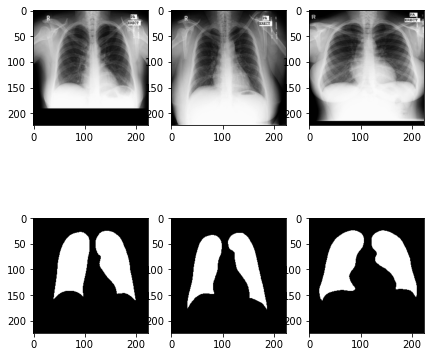

In [26]:
img_path = "/media/brats/DRIVE1/akansh/lung-seg/data/images/"
img_mask = "/media/brats/DRIVE1/akansh/lung-seg/data/masks/"


fig, ax = plt.subplots(2, 3, figsize = (7,7))
ax[0][0].imshow(plt.imread(os.path.join(img_path,img_names[0])), cmap = 'gray')
ax[0][1].imshow(plt.imread(os.path.join(img_path,img_names[1])), cmap = 'gray')
ax[0][2].imshow(plt.imread(os.path.join(img_path,img_names[2])), cmap = 'gray')
ax[1][0].imshow(plt.imread(os.path.join(img_mask,img_names[0])), cmap = 'gray')
ax[1][1].imshow(plt.imread(os.path.join(img_mask,img_names[1])), cmap = 'gray')
ax[1][2].imshow(plt.imread(os.path.join(img_mask,img_names[2])), cmap = 'gray')
